## Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


## Loading Mnist data

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


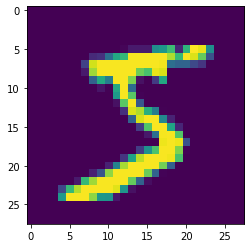

In [5]:
plt.imshow(x_train[0])

In [6]:
print(y_train[0])

5


In [11]:
print(y_test[7])

9


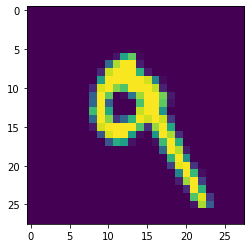

In [12]:
plt.imshow(x_test[7])

## Reshaping data to [samples][width][height][channels]

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [15]:
print(x_train[7])

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [18]:
print(x_train.shape)

(60000, 28, 28, 1)


## Normalizing inputs from 0-255 to 0-1

In [18]:
x_train = x_train / 255
x_test = x_test / 255

## One hot encode outputs

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Building the Model

In [21]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the model

In [22]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 26s - loss: 0.2388 - accuracy: 0.9304 - val_loss: 0.0725 - val_accuracy: 0.9773
Epoch 2/10
300/300 - 26s - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 3/10
300/300 - 26s - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0408 - val_accuracy: 0.9871
Epoch 4/10
300/300 - 26s - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0415 - val_accuracy: 0.9860
Epoch 5/10
300/300 - 26s - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0379 - val_accuracy: 0.9866
Epoch 6/10
300/300 - 26s - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0422 - val_accuracy: 0.9864
Epoch 7/10
300/300 - 25s - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0324 - val_accuracy: 0.9889
Epoch 8/10
300/300 - 26s - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0365 - val_accuracy: 0.9881
Epoch 9/10
300/300 - 25s - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 10/10
300/300 - 25s - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0339 - val_accura

## Error %

In [23]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 1.12%


## Accuracy %

In [25]:
print("Accuracy : %.2f%%" % (scores[1]*100))

Accuracy : 98.88%
